# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#### Load Dataset

Data setinde; musterilere ait ID numaralari,cinsiyet, yas, yillik gelir, 1-100 arasinda musterinin yaptigi harcamalarin skorlamasi var. Skorlari dusuk olanlar az harcama yapan, yuksek olanlar cok harcama yapan musteriler. 

In [2]:
df = pd.read_csv(r"C:\Users\EmincanY\Downloads\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df = df.drop('CustomerID' , axis = 1)

In [5]:
df.rename({'Annual Income (k$)' : 'Income' , 'Spending Score (1-100)' : 'Spending'} , axis = 1 , inplace = True)

In [6]:
df.head()

,Gender,Age,Income,Spending
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [8]:
df['Gender'] = df['Gender'].apply(lambda x : 1 if x == 'Male'  else 0)

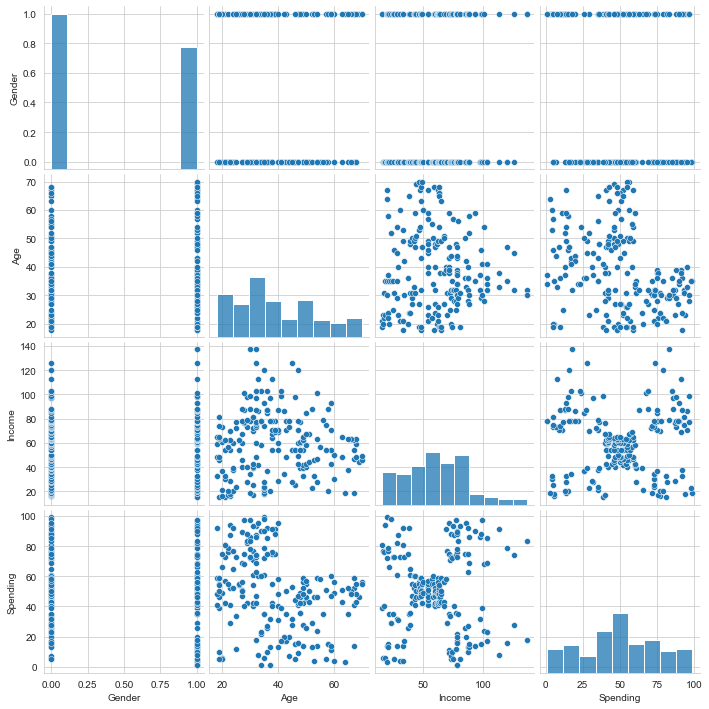

In [9]:
sns.pairplot(df);

In [10]:
df.corr()

,Gender,Age,Income,Spending
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Income,0.056410,-0.012398,1.000000,0.009903
Spending,-0.058109,-0.327227,0.009903,1.000000


In [11]:
df.corr()['Spending']

Gender     -0.058109
Age        -0.327227
Income      0.009903
Spending    1.000000
Name: Spending, dtype: float64

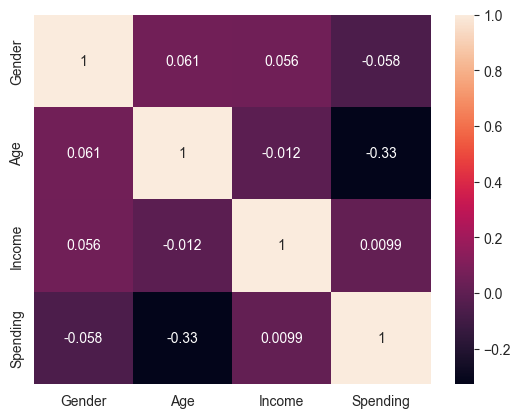

In [12]:
sns.heatmap(df.corr() , annot = True);

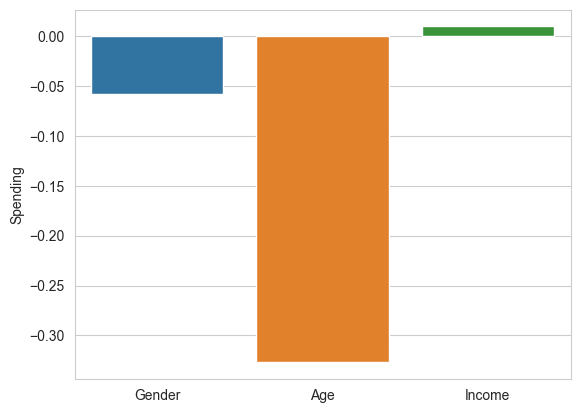

In [13]:
sns.barplot(x = df.corr()['Spending'].drop('Spending').index , y = df.corr()['Spending'].drop('Spending'));

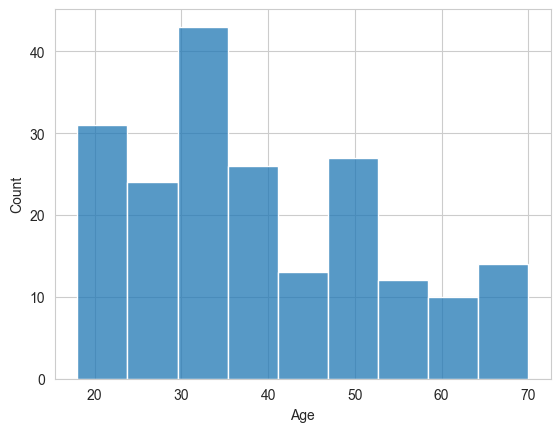

In [14]:
sns.histplot(data = df['Age']);

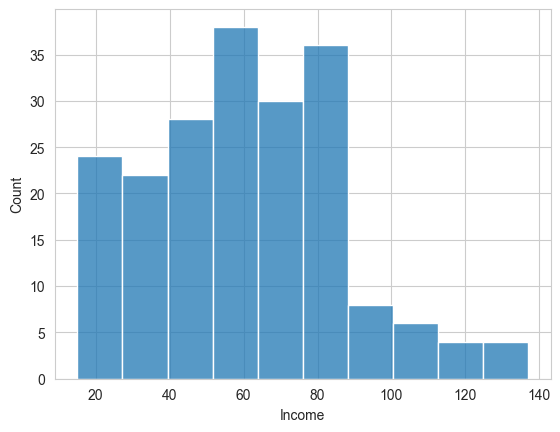

In [15]:
sns.histplot(data = df['Income']);

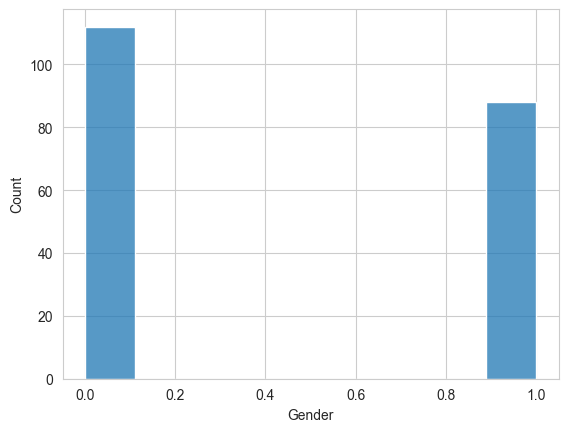

In [16]:
sns.histplot(data = df['Gender']);

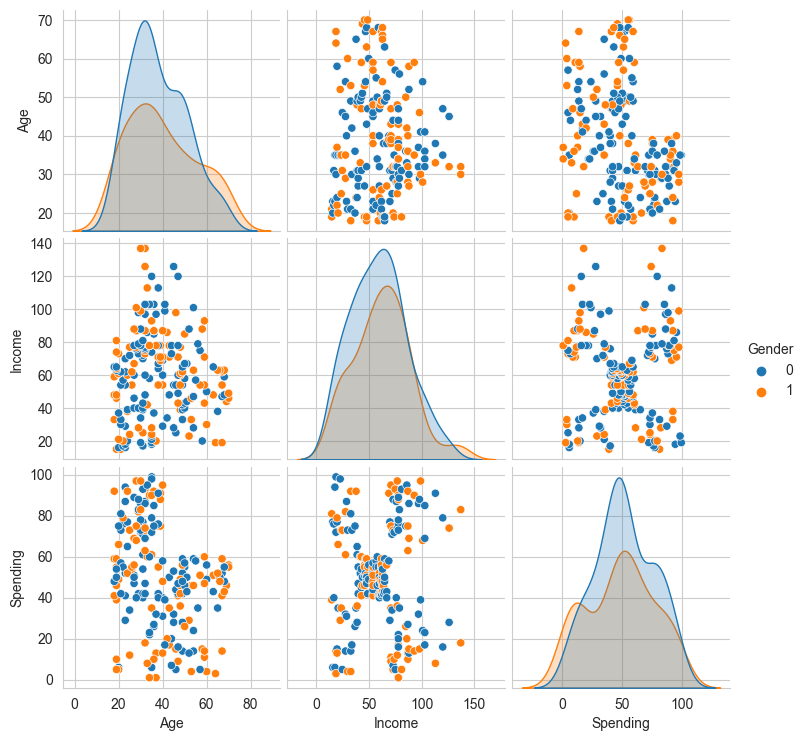

In [17]:
sns.pairplot(df , hue = 'Gender');

# Df copy

In [18]:
df_copy = df.copy()

# Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [20]:
df

,Gender,Age,Income,Spending
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [21]:
X = pd.get_dummies(df , drop_first = True)

In [22]:
X

,Gender,Age,Income,Spending
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [23]:
scaler = MinMaxScaler()

In [24]:
X_scaled = scaler.fit_transform(X)

In [25]:
# Done

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score - X1

#### *i. Create a new dataset with two variables of your choice*

In [26]:
df_age_spend = df_copy[['Age' , 'Spending']]

#### *ii. Determine optimal number of clusters*

In [27]:
from sklearn.cluster import KMeans

In [28]:
kM = KMeans(n_clusters = 2 , random_state = 53)

In [29]:
X_age_spend = scaler.fit_transform(df_age_spend)

In [30]:
cluster_labels = kM.fit_predict(X_age_spend)
cluster_labels

# df_age_spend['Predicted Class'] = kM.labels_
# df_age_spend

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [31]:
df_age_spend['Predicted Class'] = cluster_labels

C:\Users\EmincanY\AppData\Local\Temp\ipykernel_9416\3942928047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_spend['Predicted Class'] = cluster_labels


In [32]:
df_age_spend.head()

,Age,Spending,Predicted Class
0,19,39,0
1,21,81,0
2,20,6,1
3,23,77,0
4,31,40,0


In [33]:
# kM.labels_

In [34]:
kM.inertia_

13.337690580804235

In [ ]:
# Choosing The Optimal Number of Clusters

In [ ]:
## Elbow Method

In [35]:
ssd = []

K = range(2,10)

for k in K:
    kM = KMeans(n_clusters = k, random_state = 53)
    kM.fit(X_age_spend)
    ssd.append(kM.inertia_)

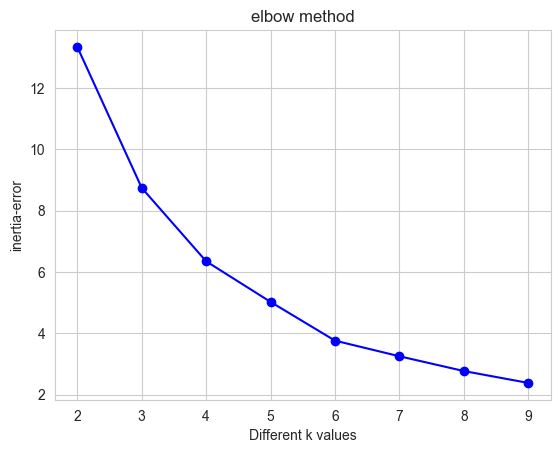

In [36]:
plt.plot(K, ssd, "bo-")

plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

plt.show()

In [37]:
ssd # 3 or 4 looking good.

[13.337690580804235,
 8.742042168276535,
 6.350049379567737,
 5.026143351352525,
 3.7642311475538297,
 3.25489275911764,
 2.7733038814938045,
 2.385807183875228]

In [38]:
pd.Series(ssd).diff()

0         NaN
1   -4.595648
2   -2.391993
3   -1.323906
4   -1.261912
5   -0.509338
6   -0.481589
7   -0.387497
dtype: float64

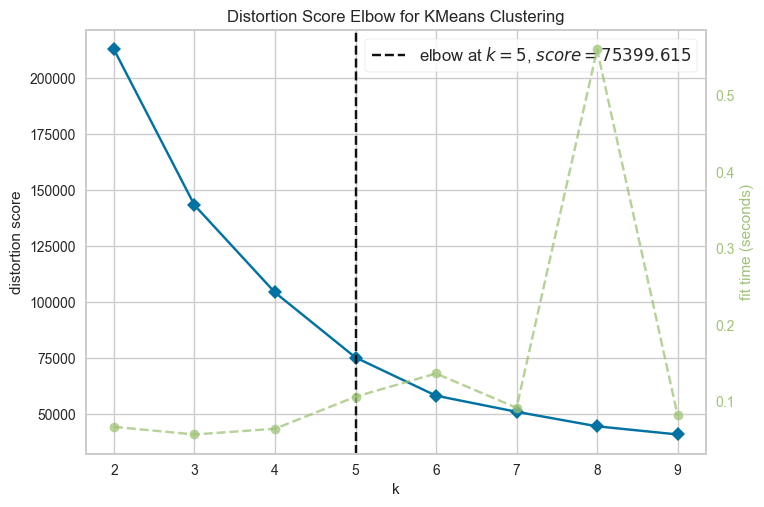

In [39]:
from yellowbrick.cluster import KElbowVisualizer

kM = KMeans(random_state = 53)
visualizer = KElbowVisualizer(kM, k = (2,10))

visualizer.fit(df)   
visualizer.show(); # It shows 4 is good for n_cluster.

In [ ]:
# Inertia and Silhoutte score are metrics
# Elbow method and visualizer are methods.

In [ ]:
## Silhouette analysis

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
range_n_clusters = range(2,10)

for num_clusters in range_n_clusters:
    # intialise kmeans
    kM = KMeans(n_clusters=num_clusters, random_state=53)
    kM.fit(X_age_spend)
    cluster_labels = kM.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_age_spend, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}") # It also says n_cluster 4 ideal.

For n_clusters=2, the silhouette score is 0.47252865228696783
For n_clusters=3, the silhouette score is 0.44058221683010546
For n_clusters=4, the silhouette score is 0.4359241957977821
For n_clusters=5, the silhouette score is 0.44625330587100703
For n_clusters=6, the silhouette score is 0.4552049208972849
For n_clusters=7, the silhouette score is 0.4090178852276988
For n_clusters=8, the silhouette score is 0.4045170040245679
For n_clusters=9, the silhouette score is 0.423651550999852


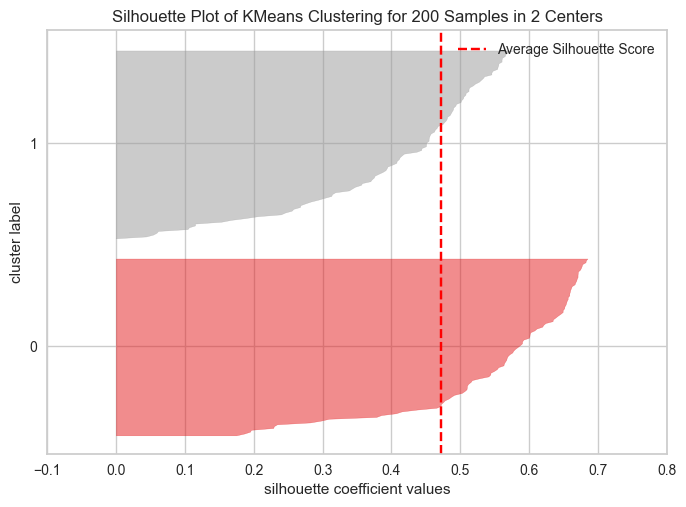

In [59]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model_real = KMeans(n_clusters = 2, random_state = 53)
visualizer = SilhouetteVisualizer(model_real)

visualizer.fit(X_age_spend)    # Fit the data to the visualizer
visualizer.poof();

In [60]:
model_real.labels_

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [61]:
df_age_spend.head()

,Age,Spending,Predicted Class,5class
0,19,39,0,1
1,21,81,0,2
2,20,6,1,1
3,23,77,0,2
4,31,40,0,1


In [62]:
df_age_spend['5class'] = model_real.labels_

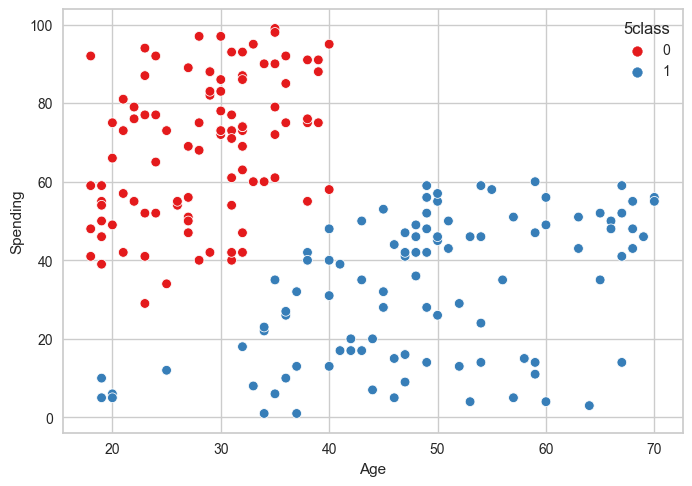

In [63]:
sns.scatterplot(data = df_age_spend , x = 'Age' , y = 'Spending' , hue = '5class' , palette = 'Set1' );

In [64]:
df_age_spend.corr()['Spending']

Age               -0.327227
Spending           1.000000
Predicted Class   -0.720697
5class            -0.720697
Name: Spending, dtype: float64

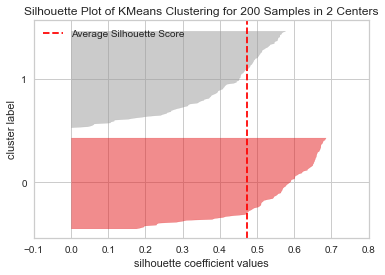

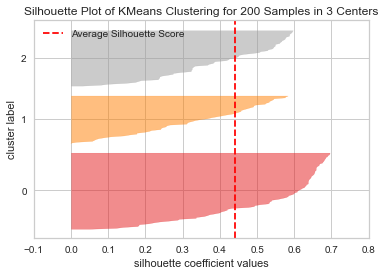

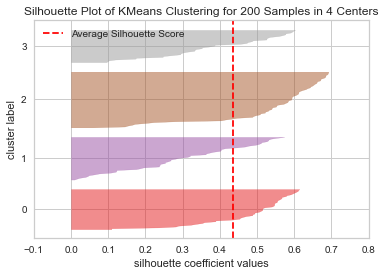

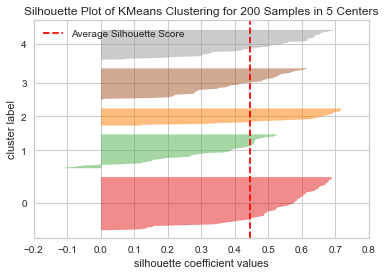

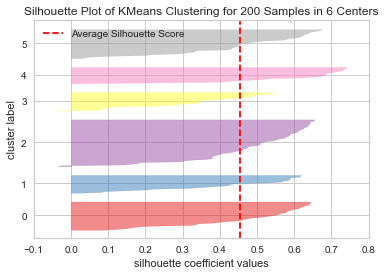

In [74]:
for i in range(2,7):
    model_real = KMeans(n_clusters = i, random_state = 53)
    visualizer = SilhouetteVisualizer(model_real)

    visualizer.fit(X_age_spend)    # Fit the data to the visualizer
    visualizer.poof();
    
    df_age_spend['5class'] = model_real.labels_
    
    # df_age_spend.corr()['Spending']
    

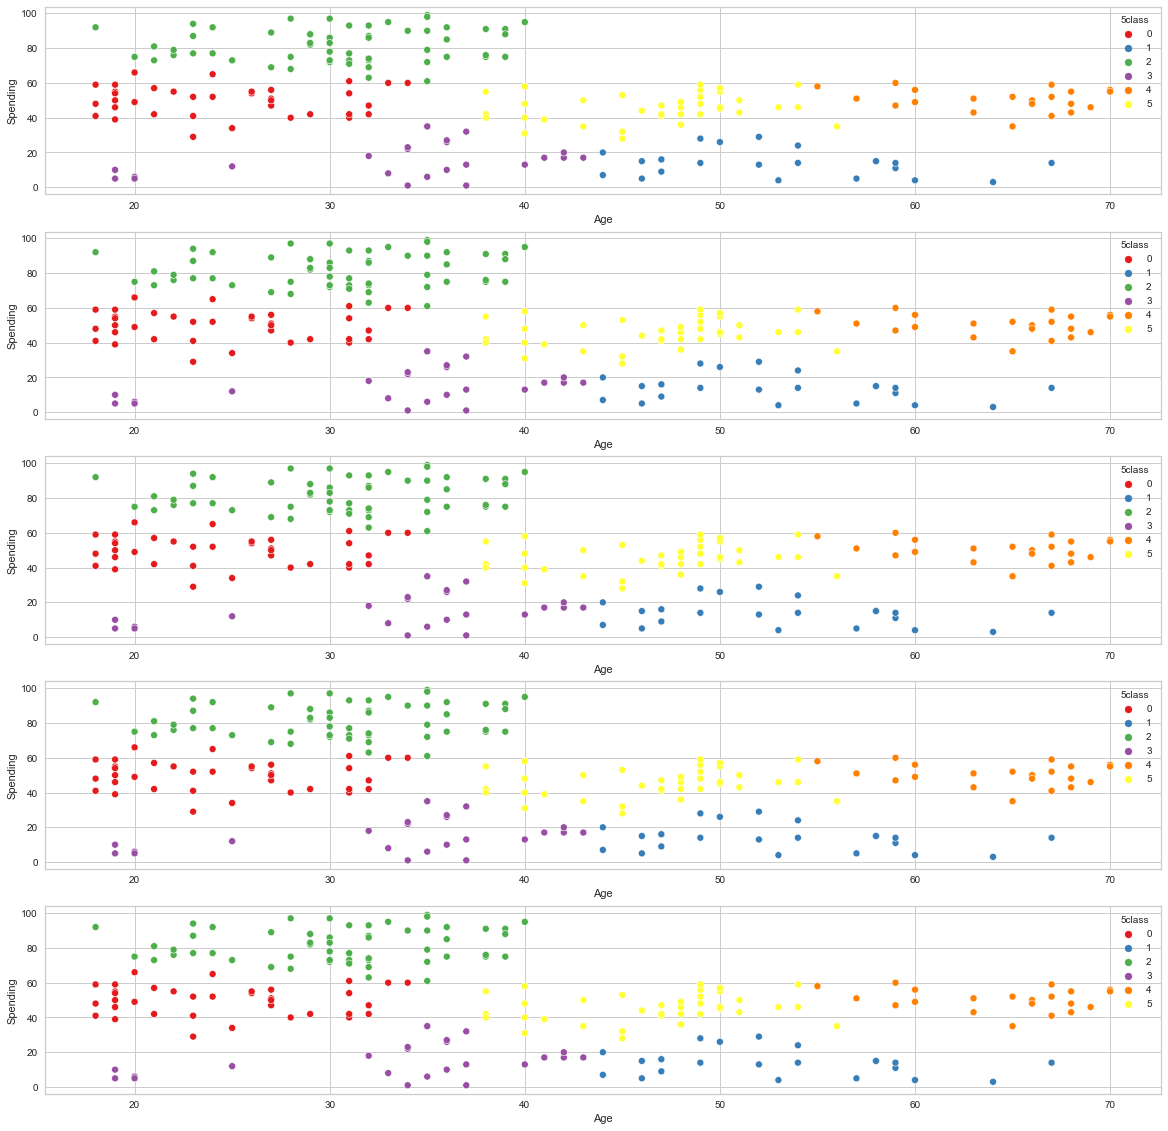

In [76]:
fig , ax = plt.subplots(5,1 , figsize = (20,20))

for i in range(2,7):
    model_real = KMeans(n_clusters = i, random_state = 53)
    visualizer = SilhouetteVisualizer(model_real)

    visualizer.fit(X_age_spend)    # Fit the data to the visualizer
    visualizer.poof();
    
    df_age_spend['5class'] = model_real.labels_
    
    ax1 = sns.scatterplot(data = df_age_spend , x = 'Age' , y = 'Spending' , hue = '5class' , palette = 'Set1' , ax = ax[0]);




ax2 = sns.scatterplot(data = df_age_spend , x = 'Age' , y = 'Spending' , hue = '5class' , palette = 'Set1' , ax = ax[1]);
ax3 = sns.scatterplot(data = df_age_spend , x = 'Age' , y = 'Spending' , hue = '5class' , palette = 'Set1' , ax = ax[2]);
ax4 = sns.scatterplot(data = df_age_spend , x = 'Age' , y = 'Spending' , hue = '5class' , palette = 'Set1' , ax = ax[3]);
ax5 = sns.scatterplot(data = df_age_spend , x = 'Age' , y = 'Spending' , hue = '5class' , palette = 'Set1' , ax = ax[4]);


In [77]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)

For n_clusters = 2 The average silhouette_score is : 0.47252865228696783
For n_clusters = 3 The average silhouette_score is : 0.44058221683010546
For n_clusters = 4 The average silhouette_score is : 0.4359241957977821
For n_clusters = 5 The average silhouette_score is : 0.44625330587100703
For n_clusters = 6 The average silhouette_score is : 0.4554676382159921


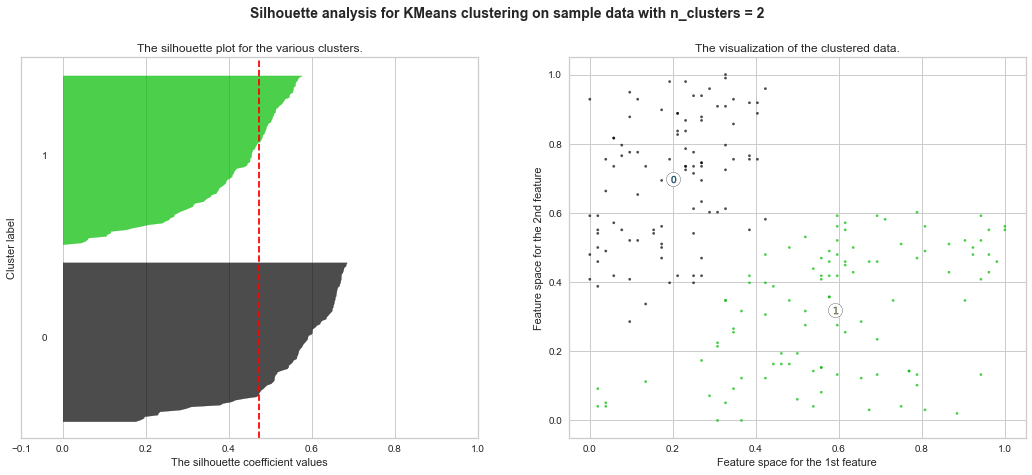

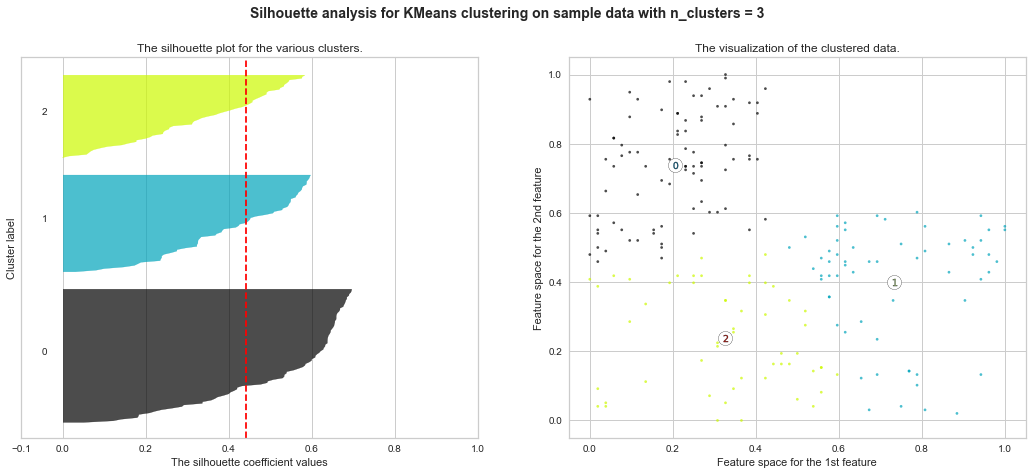

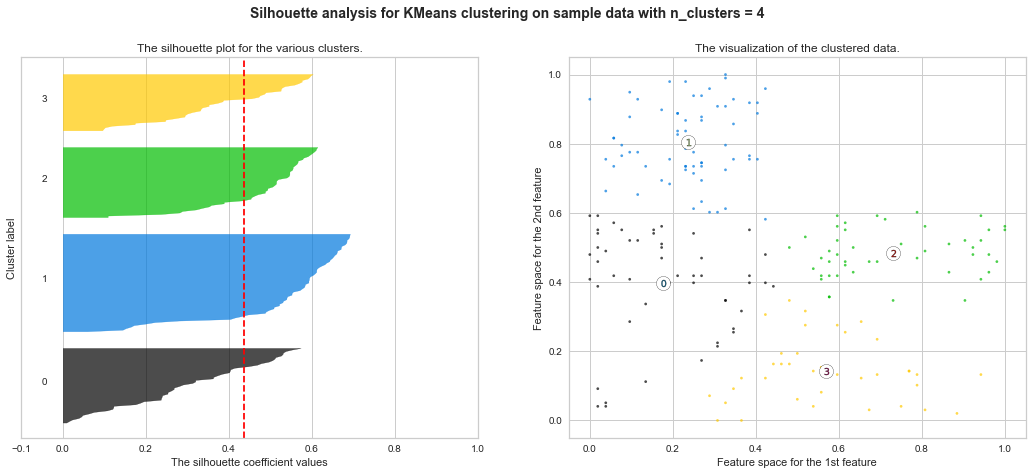

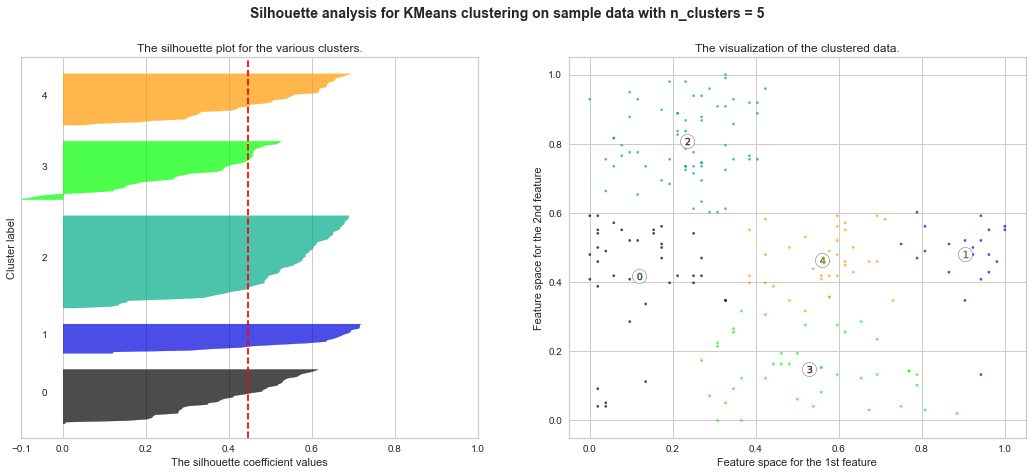

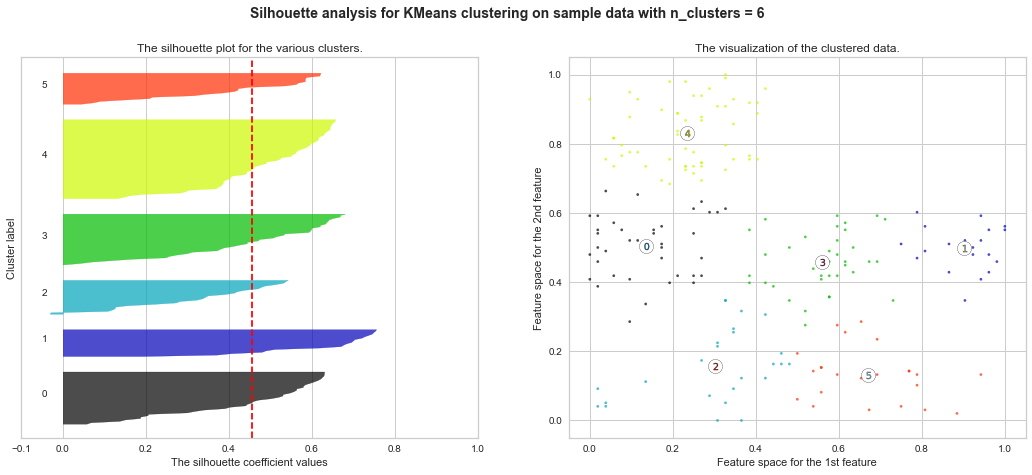

In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_age_spend) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_age_spend)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_age_spend, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_age_spend, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
# for y_col in y_columns:

#     figure = plt.figure
#     ax = plt.gca()
#     ax.scatter(data[x_col], data[y_col])
#     ax.set_xlabel(x_col)
#     ax.set_ylabel(y_col)
#     ax.set_title("{} vs {}".format(x_col, y_col))

#     plt.legend()
#     plt.show()

In [66]:
# %matplotlib inline

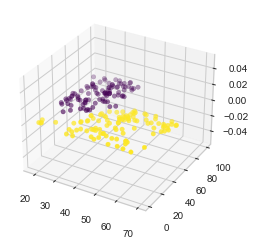

In [71]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection = "3d")
# ax.scatter(df_age_spend["Age"], df_age_spend["Spending"], c = model_real.labels_ , cmap="viridis");

# This is good for more than 2 features.

In [ ]:
# Done n_cluster = 4 good.

### Why silhouette_score is negative?

__Silhouette Score-->__ (1-√2) / √2 = -0.29

#### *iii. Apply K Means*

In [ ]:
kM = KMeans(n_clusters = 4 , random_state = 53)

In [ ]:
kM.fit(df)

In [ ]:
kM.labels_

In [ ]:
df['Predicted Class'] = kM.labels_

In [ ]:
df

In [ ]:
df.groupby('Predicted Class').mean()

In [ ]:
df.groupby('Predicted Class').count()['Spending']

In [ ]:
# Cluster 0 : Their age mean is 30 and they are spending too much. Very good customers.
# Cluster 1 : Their age mean is also around 30 and they are spending much. Good customers.
# Cluster 2 : Their age mean is 55 and they are spending much. Also good but dying customers lol.
# Cluster 3 : Their age mean is 43 but they spend too few. So we need to do something for them.

#### *iv. Visualizing and Labeling All the Clusters*

In [ ]:
plt.scatter(x = df['Age'] , y = df['Spending'] , c = df['Predicted Class'] , cmap = 'viridis' );

In [ ]:
centers = kM.cluster_centers_
centers

In [ ]:
centers[:,0] 

In [ ]:
centers[:,1]

In [ ]:
plt.scatter(centers[:,0], centers[:,1], c = "black");

In [ ]:
plt.scatter(df["Age"], df["Spending"], c = df['Predicted Class'], cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
# Done.

### Clustering based on Annual Income and Spending Score - X2

In [ ]:
df = df_copy[['Income' , 'Spending']]

In [ ]:
df

In [ ]:
# Choosing The Optimal Number of Clusters
# Elbow Method

In [ ]:
ssd = []

K = range(2,10)

for k in K:
    kM = KMeans(n_clusters = k, random_state = 53)
    kM.fit(df)
    ssd.append(kM.inertia_)

In [ ]:
plt.plot(K, ssd, "bo-")

plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

plt.show() # 5 clusters looking good.

In [ ]:
ssd

In [ ]:
pd.Series(ssd).diff()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

kM = KMeans(random_state=53)
visualizer = KElbowVisualizer(kM, k = (2,10))

visualizer.fit(df)   
visualizer.show(); # It shows 5 is good for n_cluster.

In [ ]:
# Choosing The Optimal Number of Clusters
# Silhouette analysis

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
range_n_clusters = range(2,10)

for num_clusters in range_n_clusters:
    # intialise kmeans
    kM = KMeans(n_clusters = num_clusters, random_state = 53)
    kM.fit(df)
    cluster_labels = kM.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}") # It says n_cluster 5 ideal.

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model_real = KMeans(n_clusters = 5, random_state = 53)
visualizer = SilhouetteVisualizer(model_real)

visualizer.fit(df)    # Fit the data to the visualizer
visualizer.poof();

In [ ]:
# To be Continued

#### *i. Create a new dataset with two variables of your choice*

#### *ii. Determine optimal number of clusters*

#### *iii. Apply K Means*

#### *iv. Visualizing and Labeling All the Clusters*

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- X1

## Clustering based on Annual Income and Spending Score- X2

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- X1

#### Annual Income and Spending Score- X2

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- X1

#### Annual Income and Spending Score- X2

#### Interpretation based on Age and Spending Score- X1

### Conclusion

**cluster 0** : The average age is around 56. both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 43. the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 28. Both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- X2

## Conclusion

### Female

**cluster 0** : The average age is around 41, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 43, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 43. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 32, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 39, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 48. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 43, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 41, the annula_income is very high but the spending_scores is very low. This group is our target audience and special strategies need to be developed for this group.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.